{17664641.0, 22770818.0, 7922435.0, 31292162.0, 19832965.0, 30844808.0, 25144329.0, 11379467.0, 18641549.0, 15618446.0, 1529999.0, 9451792.0, 31542420.0, 27590037.0, 15672854.0, 31155991.0, 15662998.0, 32020249.0, 18786076.0, 16293159.0, 23823655.0, 12626992.0, 9952177.0, 20210484.0, 17643322.0, 18727354.0, 30707268.0, 19426245.0, 25327557.0, 23905863.0, 22177737.0, 8004299.0, 19544139.0, 28107979.0, 10368854.0, 27871319.0, 9061467.0, 18425437.0, 11811421.0, 25522399.0, 11246304.0, 14567648.0, 18429538.0, 21383648.0, 21627621.0, 21757286.0, 9290986.0, 8103279.0, 27704176.0, 9479922.0, 33660661.0, 11895804.0}
{17503744.0, 23738369.0, 23790595.0, 12244483.0, 32070148.0, 25056265.0, 24713737.0, 31416331.0, 26166286.0, 17393167.0, 23884303.0, 25901074.0, 16026645.0, 23444501.0, 11914777.0, 25220635.0, 32573468.0, 23479838.0, 19343903.0, 24211998.0, 19059744.0, 9739296.0, 24259619.0, 26720803.0, 8215078.0, 25168936.0, 25168938.0, 10626097.0, 34591799.0, 28828219.0, 18503229.0, 18783293.0, 2

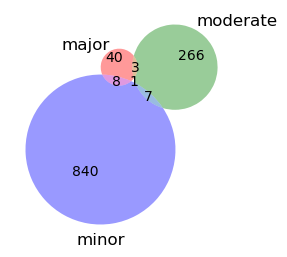

In [33]:
#module 2.2 

import pandas as pd
import numpy as np
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


KEGG_df = pd.read_csv("../Files/Figure2/Table3.csv",index_col=0)


def generate_pmid_set(df):
    pmid_set = set()
    for line in df.itertuples():
       st = set([f"{x:.0f}" for x in line[12:] if pd.isnull(x) == False and x != "nan"])#retrieve pmid (after index 12)
       pmid_set.update(st)#update
    return pmid_set

def grouping(df,i,j):
    df1 = df[df["Amounts"]<i]
    df2 = df[(df["Amounts"]>=i)&(df["Amounts"]<j)]
    df3 = df[df["Amounts"]>=j]
    return df1, df2, df3

df1,df2,df3 = grouping(KEGG_df,10,100)
display(df1)
display(df2)
display(df3)
dic = {}
for i,df in enumerate([df1,df2,df3]):
    dic[i]=generate_pmid_set(df)

print("minor")
print(dic[0])
print(len(dic[0]))
print("=========")
print("moderate")
print(dic[1])
print(len(dic[1]))
print("=========")
print("major")
print(dic[2])
print(len(dic[2]))
print("=========")

total = len(set(dic[0]|dic[1]|dic[2]))
print("total size; ",str(total))
plt.figure(figsize=(5,5))
venn3([dic[0],dic[1],dic[2]])
plt.savefig("../Files/Figure2/Figure 2C.png",format="png",dpi=500)